# Desafio (ML para detectar Exoplanetas)

* Understanding datas

In [10]:
# pandas

import pandas as pd 

# df1 - cumulative_2025

df1 = pd.read_csv('cumulative_2025.10.04_14.14.53.csv', sep=',', encoding='utf-8', comment='#')
print(df1.head())

      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2  10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.969              0              0              0              0  ...   
2      0.000              0              0              0              0  ...   
3      0.000              0              1              0              0  ...   
4      1.000              0              0              0              0  ...   

   koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \


In [11]:
print(df1.columns.tolist()) 

df_koi = df1.copy() # indepent copy of df1
print("shape:", df_koi.shape) # shape for lines and columns
print(df_koi.head(3))

['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']
shape: (9564, 49)
      kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1  10797460  K00752.02  Kepler-227 c       C

In [12]:
# normalizing datas

df_koi.columns = (
    df_koi.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_') # substitui espaços por _
    .str.replace('(', '') # remove (
    
)

print(df_koi.columns.tolist())

['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [13]:
print(df_koi)

         kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
3     10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9559  10090151  K07985.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9561  10147276  K07987.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   
9563  10156110  K07989.01           NaN  FALSE POSITIVE   FALSE POSITIVE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       

In [14]:
print(df_koi.describe(include='all').T.head(20)) # estatísticas descritivas e categoricas

                   count unique             top  freq            mean  \
kepid             9564.0    NaN             NaN   NaN  7690628.327373   
kepoi_name          9564   9564       K07989.01     1             NaN   
kepler_name         2747   2747   Kepler-1975 b     1             NaN   
koi_disposition     9564      3  FALSE POSITIVE  4839             NaN   
koi_pdisposition    9564      2  FALSE POSITIVE  4847             NaN   
koi_score         8054.0    NaN             NaN   NaN        0.480829   
koi_fpflag_nt     9564.0    NaN             NaN   NaN        0.208595   
koi_fpflag_ss     9564.0    NaN             NaN   NaN        0.232748   
koi_fpflag_co     9564.0    NaN             NaN   NaN        0.197512   
koi_fpflag_ec     9564.0    NaN             NaN   NaN        0.120033   
koi_period        9564.0    NaN             NaN   NaN       75.671358   
koi_period_err1   9110.0    NaN             NaN   NaN        0.002148   
koi_period_err2   9110.0    NaN             NaN   N

In [15]:
# padronizando coluna de rótulo (koi_disposition)

# is_planet = 1
# false_positive = 0
# candidate = 2

# clean strings and create labels
df_koi['koi_disposition'] = df_koi['koi_disposition'].astype(str).str.strip().str.upper() # astype convert all value to string
 
# multiclass mapping categories to integers
mapping_multi = {'FALSE POSITIVE': 0, 'CONFIRMED': 1, 'CANDIDATE': 2}
df_koi['disposition_cat'] = df_koi['koi_disposition'].map(mapping_multi)

# binário: considerar CANDIDATE e CONFIRMED como "positivo" (1) e FALSE POSITIVE como 0
df_koi['is_planet'] = df_koi['koi_disposition'].apply(
    lambda x: 1 if x in ('CANDIDATE', 'CONFIRMED') else 0
)

print(df_koi['koi_disposition'])
print(df_koi['disposition_cat'].value_counts(dropna=False))
print(df_koi['is_planet'].value_counts(dropna=False))

0            CONFIRMED
1            CONFIRMED
2            CANDIDATE
3       FALSE POSITIVE
4            CONFIRMED
             ...      
9559    FALSE POSITIVE
9560         CANDIDATE
9561    FALSE POSITIVE
9562         CANDIDATE
9563    FALSE POSITIVE
Name: koi_disposition, Length: 9564, dtype: object
disposition_cat
0    4839
1    2746
2    1979
Name: count, dtype: int64
is_planet
0    4839
1    4725
Name: count, dtype: int64


In [16]:
# distribuição de classes (para analisar desequilibrio)

print("Distribuição (binária):")
print(df_koi['is_planet'].value_counts(normalize=False))
print(df_koi['is_planet'].value_counts(normalize=True))  # proporções

# distribuição multiclass
print("Distribuição (multiclasse):")
print(df_koi['disposition_cat'].value_counts(dropna=False))


Distribuição (binária):
is_planet
0    4839
1    4725
Name: count, dtype: int64
is_planet
0    0.50596
1    0.49404
Name: proportion, dtype: float64
Distribuição (multiclasse):
disposition_cat
0    4839
1    2746
2    1979
Name: count, dtype: int64


In [ ]:
# features engineering
candidates = [
    'koi_period', 'koi_time0bk', 'koi_duration', 'koi_depth', 'koi_prad',
    'koi_srad', 'koi_steff', 'koi_slogg', 'koi_kepmag', 'koi_score',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_model_snr'  # 
]

# manter só as que existem no df
features = [c for c in candidates if c in df_koi.columns]
print("features selecionadas:", features)


features selecionadas: ['koi_period', 'koi_time0bk', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_srad', 'koi_steff', 'koi_slogg', 'koi_kepmag', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_model_snr']


In [18]:
import numpy as np
# converter para numérico (coerce transforma valores inválidos em NaN)
for c in features:
    df_koi[c] = pd.to_numeric(df_koi[c], errors='coerce')

# checar quantos NaNs por feature
missing_pct = df_koi[features].isnull().mean().sort_values(ascending=False)
print("percentual missing por feature:")
print(missing_pct)


percentual missing por feature:
koi_score        0.157884
koi_prad         0.037955
koi_srad         0.037955
koi_steff        0.037955
koi_model_snr    0.037955
koi_slogg        0.037955
koi_depth        0.037955
koi_kepmag       0.000105
koi_time0bk      0.000000
koi_duration     0.000000
koi_period       0.000000
koi_fpflag_nt    0.000000
koi_fpflag_ss    0.000000
koi_fpflag_co    0.000000
koi_fpflag_ec    0.000000
dtype: float64


In [19]:
# decidir se dropa colunas com > X% de missing
thresh_col = 0.5  # se >50% missing, considerar remover
cols_to_drop = missing_pct[missing_pct > thresh_col].index.tolist()
print("colunas com >50% missing (sugerido drop):", cols_to_drop)

# manter features úteis 
features = [f for f in features if f not in cols_to_drop]

# preencher numéricos com mediana
medians = df_koi[features].median()
df_koi[features] = df_koi[features].fillna(medians)

# preencher flags (0/1) com 0
flags = [c for c in features if c.startswith('koi_fpflag_')]
for f in flags:
    df_koi[f] = df_koi[f].fillna(0).astype(int)


colunas com >50% missing (sugerido drop): []


* GroupShuffleSplit.split(X, y, groups) garante que todas as linhas com o mesmo valor em groups (aqui kepid) fiquem inteiras no treino ou no teste.

* test_size=0.2 reserva 20% dos grupos para teste.

* Separação de treino e teste consistente (com GroupShuffleSplit usando kepid como grupo), e isso é uma etapa fundamental para garantir que dados de uma mesma estrela não apareçam nos dois conjuntos

In [20]:
from sklearn.model_selection import GroupShuffleSplit

# preparar X e y
X = df_koi[features].copy()
y = df_koi['is_planet'].copy()
groups = df_koi['kepid'] if 'kepid' in df_koi.columns else None

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("treino:", X_train.shape, "teste:", X_test.shape)


treino: (7662, 15) teste: (1902, 15)


* StandardScaler (Z-score Normalization)
* z = (x - μ) / σ

In [21]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import joblib  # salvar/carregar modelos

# SHAP para explicabilidade
import shap

# Opção: suprimir warnings para saída mais limpa
import warnings
warnings.filterwarnings('ignore')


In [22]:
# Calcular peso do positivo para XGBoost (ajuda com classes desbalanceadas)
# scale_pos_weight = (#negativos) / (#positivos)
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
scale_pos_weight = n_neg / max(1, n_pos)
print("n_pos:", n_pos, "n_neg:", n_neg, "scale_pos_weight:", round(scale_pos_weight, 3))


n_pos: 3804 n_neg: 3858 scale_pos_weight: 1.014


In [23]:
# Padronizar (média 0, std 1) usando o scaler ajustado apenas no treino
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [24]:
# Definir o classificador XGBoost
clf = xgb.XGBClassifier(
    n_estimators=300,          # número de árvores
    max_depth=6,               # profundidade máxima de cada árvore
    learning_rate=0.05,        # taxa de aprendizado (menor = mais estável)
    subsample=0.8,             # amostragem de linhas por árvore (reduce overfitting)
    colsample_bytree=0.8,      # amostragem de colunas por árvore
    scale_pos_weight=scale_pos_weight,  # ajuda no desbalanceamento
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Treinar no conjunto de treino escalado
clf.fit(X_train_scaled, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


* Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [25]:
# Previsões
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]  # probabilidade da classe positiva

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)  # PR AUC (precision-recall area)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")
print(f"PR AUC:    {pr_auc:.4f}")


Accuracy:  0.9874
Precision: 0.9817
Recall:    0.9924
F1-score:  0.9870
ROC AUC:   0.9985
PR AUC:    0.9985


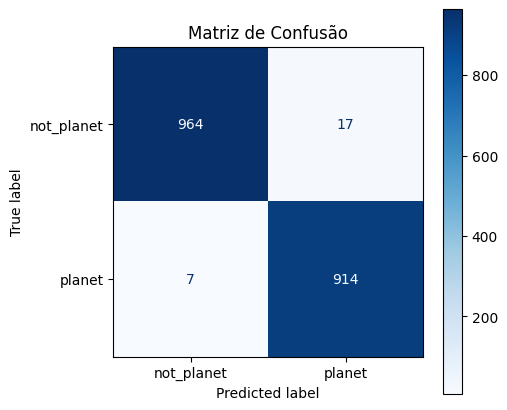

In [26]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_planet','planet'])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title("Matriz de Confusão")
plt.show()


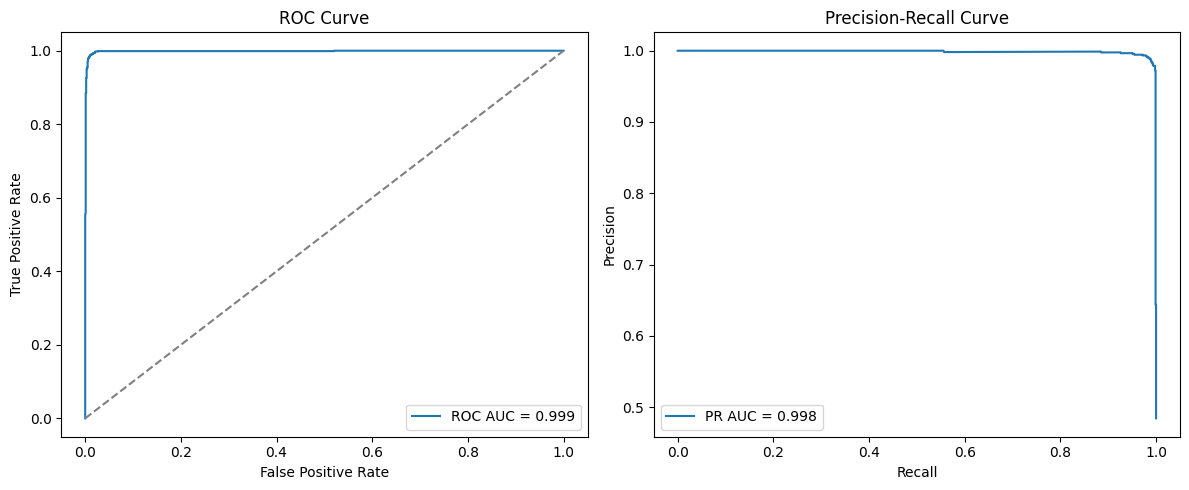

In [27]:
# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
# PR
precisions, recalls, _ = precision_recall_curve(y_test, y_proba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
ax1.plot([0,1],[0,1],'--', color='gray')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

ax2.plot(recalls, precisions, label=f'PR AUC = {pr_auc:.3f}')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend()

plt.tight_layout()
plt.show()


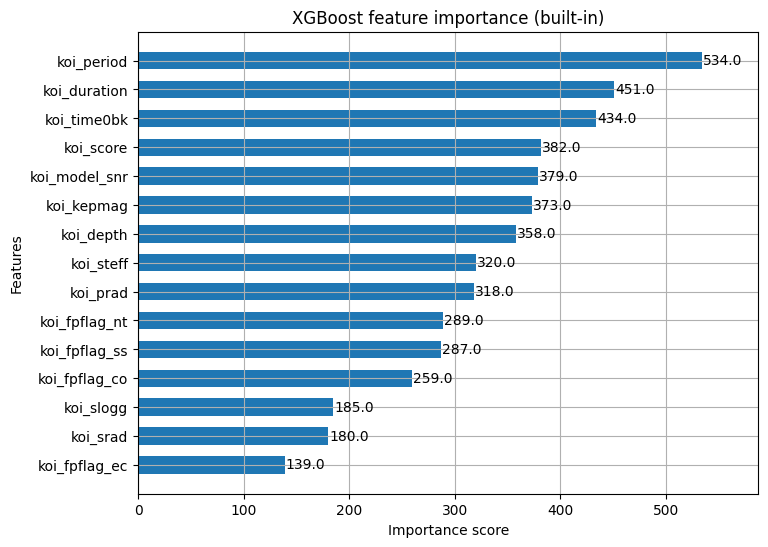

In [28]:
# Importância nativa (gain/weight)
fig, ax = plt.subplots(figsize=(8,6))
xgb.plot_importance(clf, max_num_features=20, height=0.6, ax=ax)
ax.set_title('XGBoost feature importance (built-in)')
plt.show()


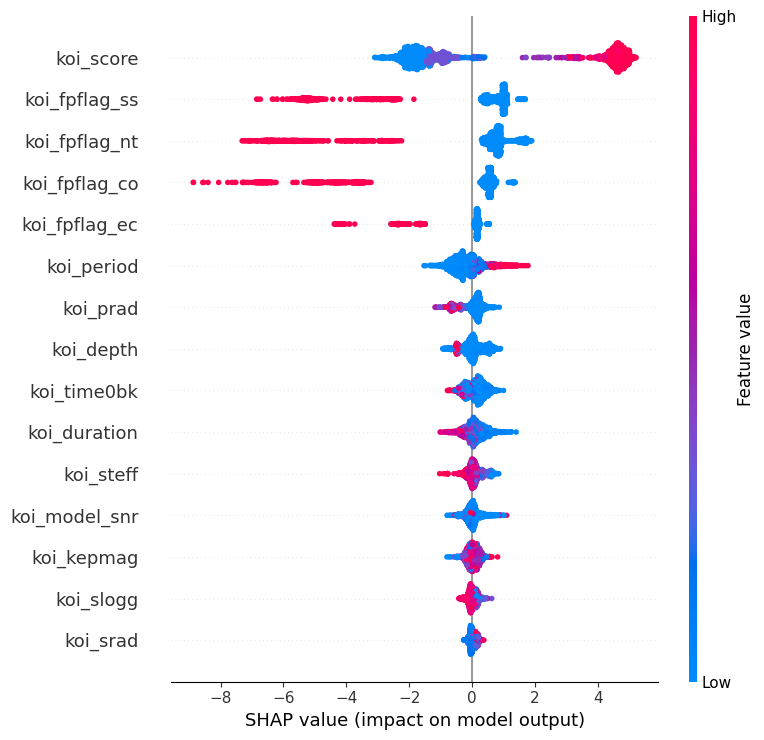

In [ ]:
# Criar o explicador SHAP para modelos de árvore 
    explainer = shap.TreeExplainer(clf)         # otimizado para modelos em árvore
    shap_values = explainer.shap_values(X_test_scaled)  # retorna array de SHAP values
except Exception as e:
    print("TreeExplainer falhou, tentando Explainer genérico:", e)
    explainer = shap.Explainer(clf, X_train_scaled)
    shap_values = explainer(X_test_scaled).values

# Summary plot (visão global: quais features mais importam e direção)
# Converte X_test_scaled para DataFrame se não for
X_test_plot = X_test_scaled.copy()
shap.summary_plot(shap_values, X_test_plot, show=True)


Top features SHAP: ['koi_score', 'koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ec']


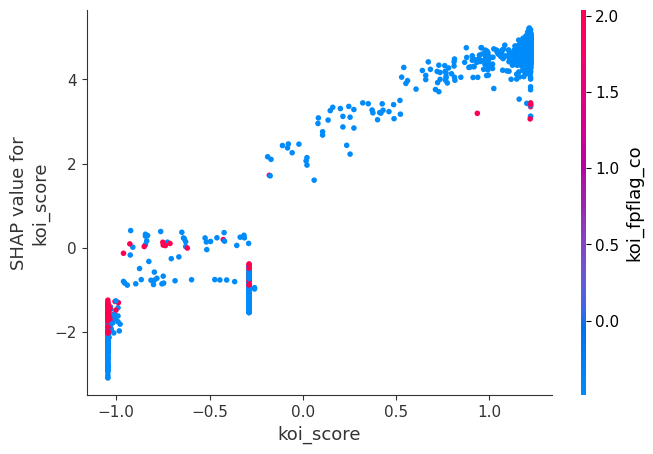

In [30]:
# Identificar a feature mais importante via mean(|SHAP|)
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-5:][::-1]  # top 5 índices
top_features = X_test_plot.columns[top_idx].tolist()
print("Top features SHAP:", top_features)

# Fazer dependence plot para a melhor feature
shap.dependence_plot(top_features[0], shap_values, X_test_plot, show=True)


In [31]:
# Criar DataFrame com predições e probabilidades
df_eval = X_test_scaled.copy()
df_eval['y_true'] = y_test.values
df_eval['y_pred'] = y_pred
df_eval['y_proba'] = y_proba
# Se você manteve índices originais (do df_koi), podemos recuperar kepid e outras colunas:
if 'kepid' in df_koi.columns:
    df_eval['kepid'] = df_koi.loc[df_eval.index, 'kepid']

# Falsos negativos: verdade=1, predito=0 (planetas perdidos)
fn = df_eval[(df_eval['y_true']==1) & (df_eval['y_pred']==0)]
print("Falsos negativos (amostras):", len(fn))
display(fn.head(10))

# Falsos positivos: verdade=0, predito=1 (falsos alarmes)
fp = df_eval[(df_eval['y_true']==0) & (df_eval['y_pred']==1)]
print("Falsos positivos (amostras):", len(fp))
display(fp.head(10))


Falsos negativos (amostras): 7


,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_srad,koi_steff,koi_slogg,koi_kepmag,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_model_snr,y_true,y_pred,y_proba,kepid
1673,-0.009293,0.164463,-0.031654,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.627212,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.429435,7033233
2169,-0.044079,0.259875,-0.290280,-0.283517,-0.034483,-0.151903,-0.379455,0.590169,-3.280604,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.309834,1,0,0.496019,8478994
2210,-0.018678,0.432243,0.506204,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-3.280604,-0.288260,0.146533,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.000634,8478994
2767,-0.052625,-0.514726,-0.712386,-0.280997,-0.034174,-0.134344,-0.474752,0.523282,1.069498,1.159281,-0.041341,1.810541,-0.491338,-0.360216,-0.296412,1,0,0.085923,10585738
8441,0.002645,0.072893,0.389542,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-0.418714,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.415663,6368222
8483,-0.050303,-0.454105,5.863577,-0.280888,-0.032259,-0.007705,1.451792,-0.500779,-0.515959,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.243603,1,0,0.414076,10670112
9060,-0.016438,0.049692,0.209246,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-1.885316,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.445922,10079420


Falsos positivos (amostras): 17


,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_srad,koi_steff,koi_slogg,koi_kepmag,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_model_snr,y_true,y_pred,y_proba,kepid
623,-0.045728,-0.354460,0.209701,-0.278743,-0.033862,-0.137607,0.246414,0.541733,0.657466,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.283617,0,1,0.810701,3340070
2000,0.005076,0.510217,0.353180,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.635136,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,0,1,0.506600,8676038
2100,-0.041271,-0.481349,-0.240131,-0.236393,-0.032790,-0.116475,0.088015,0.292638,2.183135,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.306949,0,1,0.932535,2437505
2244,-0.048180,-0.416305,0.012238,-0.238161,-0.032921,-0.128906,-0.094852,0.465621,0.351324,1.220445,-0.041341,-0.552321,-0.491338,-0.360216,0.042899,0,1,0.999530,3642741
2361,0.058217,0.603431,0.424389,-0.282965,4.434677,-0.052456,0.113771,-0.443118,-2.738192,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.303060,0,1,0.877340,8167959
5634,-0.032077,-0.414594,-0.134680,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.321790,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,0,1,0.629811,10963242
5680,0.037412,-0.510942,0.472872,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.477382,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,0,1,0.576339,10336927
5704,0.005214,0.493826,-0.402852,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.599839,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,0,1,0.762123,10880007
5708,0.080742,0.087621,0.118340,-0.278968,-0.034076,-0.149261,-0.063945,0.613233,0.800092,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.310963,0,1,0.625114,8107115
5770,0.030887,1.091152,0.506204,-0.282389,-0.034207,-0.094876,0.722899,0.121961,-0.519561,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.311088,0,1,0.953219,10749128


In [32]:
# df_eval foi construído antes (X_test_scaled + y_true/y_pred/y_proba)
fn = df_eval[(df_eval['y_true']==1) & (df_eval['y_pred']==0)].copy()
print("FNs:", len(fn))
display(fn[['kepid'] + X_train.columns.tolist() + ['y_true','y_pred','y_proba']].head(20))


FNs: 7


,kepid,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_srad,koi_steff,koi_slogg,koi_kepmag,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_model_snr,y_true,y_pred,y_proba
1673,7033233,-0.009293,0.164463,-0.031654,-0.278508,-0.033853,-0.116475,0.071274,0.292638,0.627212,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.429435
2169,8478994,-0.044079,0.259875,-0.290280,-0.283517,-0.034483,-0.151903,-0.379455,0.590169,-3.280604,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.309834,1,0,0.496019
2210,8478994,-0.018678,0.432243,0.506204,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-3.280604,-0.288260,0.146533,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.000634
2767,10585738,-0.052625,-0.514726,-0.712386,-0.280997,-0.034174,-0.134344,-0.474752,0.523282,1.069498,1.159281,-0.041341,1.810541,-0.491338,-0.360216,-0.296412,1,0,0.085923
8441,6368222,0.002645,0.072893,0.389542,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-0.418714,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.415663
8483,10670112,-0.050303,-0.454105,5.863577,-0.280888,-0.032259,-0.007705,1.451792,-0.500779,-0.515959,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.243603,1,0,0.414076
9060,10079420,-0.016438,0.049692,0.209246,-0.278508,-0.033853,-0.116475,0.071274,0.292638,-1.885316,-0.288260,-0.041341,-0.552321,-0.491338,-0.360216,-0.290266,1,0,0.445922


* Curva de Luz

Plotando KIC/KepID: 7033233 prob: 0.42943477630615234


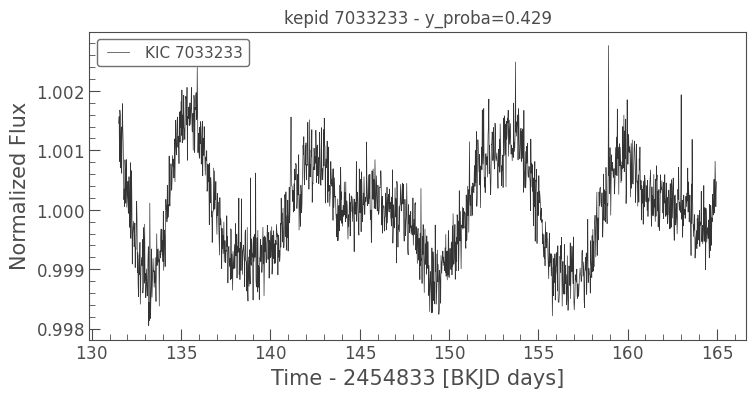

Plotando KIC/KepID: 8478994 prob: 0.4960193634033203


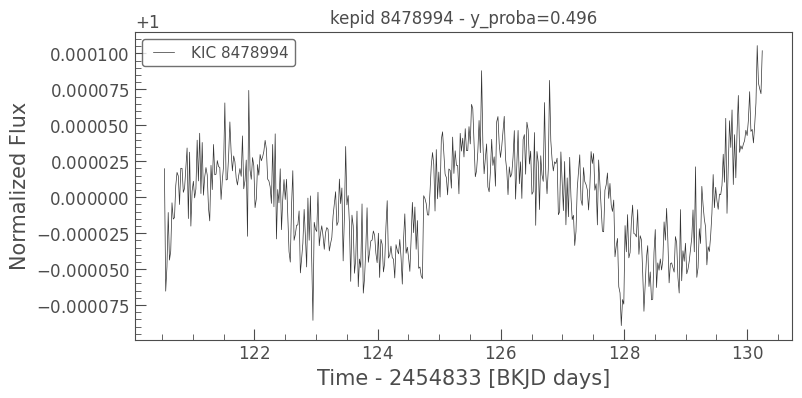

Plotando KIC/KepID: 8478994 prob: 0.0006343729910440743


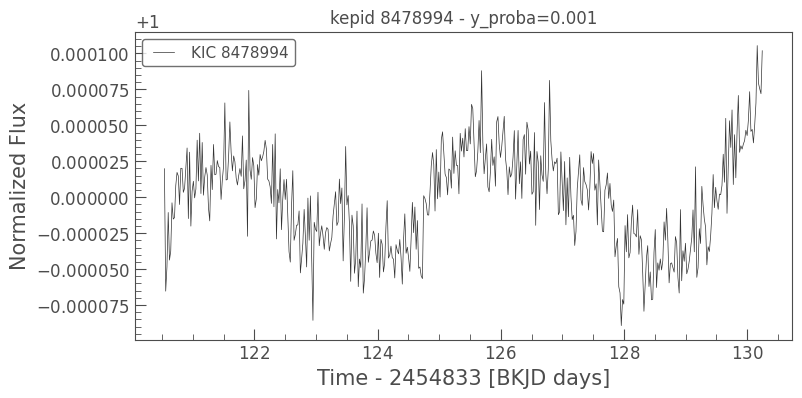

Plotando KIC/KepID: 10585738 prob: 0.0859232172369957


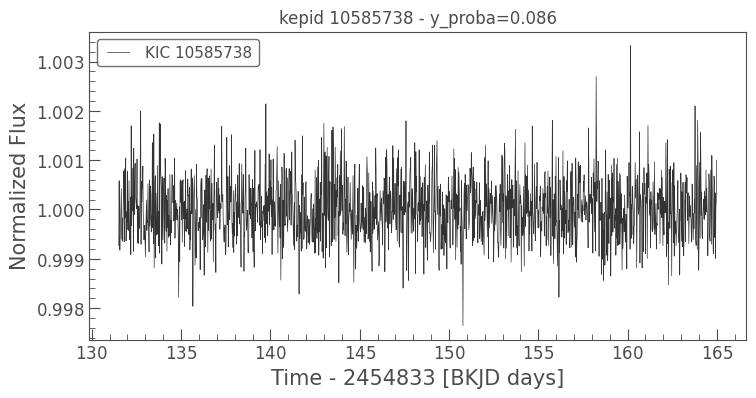

Plotando KIC/KepID: 6368222 prob: 0.4156632423400879


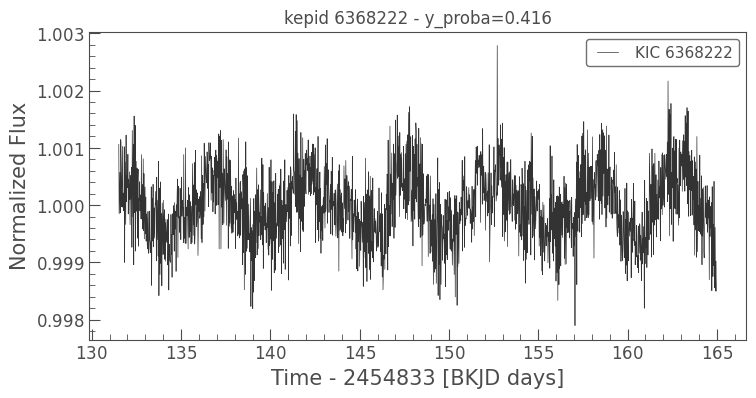

In [33]:
from lightkurve import search_lightcurvefile
for idx, row in fn.head(5).iterrows():
    kep = int(row['kepid'])
    print("Plotando KIC/KepID:", kep, "prob:", row['y_proba'])
    try:
        lcf = search_lightcurvefile(f'KIC {kep}', mission='Kepler').download()
        lc = lcf.PDCSAP_FLUX.remove_nans().normalize().flatten(window_length=401)
        lc.plot()
        plt.title(f'kepid {kep} - y_proba={row["y_proba"]:.3f}')
        plt.show()
    except Exception as e:
        print("Erro ao baixar/plotar:", e)


In [34]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
# escolher threshold que maximize recall para uma precisão mínima, por exemplo 0.75
min_prec = 0.75
valid_idxs = np.where(precision >= min_prec)[0]
if len(valid_idxs) > 0:
    chosen_idx = valid_idxs[np.argmax(recall[valid_idxs])]
    chosen_thresh = thresholds[chosen_idx] if chosen_idx < len(thresholds) else 0.5
else:
    # fallback: threshold que maximiza F1
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
    chosen_idx = np.argmax(f1_scores)
    chosen_thresh = thresholds[chosen_idx] if chosen_idx < len(thresholds) else 0.5

print("Threshold escolhido:", chosen_thresh)

# aplicar novo threshold
y_pred_new = (y_proba >= chosen_thresh).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))


Threshold escolhido: 0.0012861614
              precision    recall  f1-score   support

           0       1.00      0.69      0.81       981
           1       0.75      1.00      0.86       921

    accuracy                           0.84      1902
   macro avg       0.87      0.84      0.84      1902
weighted avg       0.88      0.84      0.84      1902



#  DETECÇÃO DE EXOPLANETAS


In [ ]:
# 1. SALVAR O MODELO TREINADO PARA USO FUTURO
import joblib
import pickle

# Salvar o modelo e o scaler
joblib.dump(clf, 'exoplanet_detector_model.pkl')
joblib.dump(scaler, 'exoplanet_scaler.pkl')

# salve  features 
with open('exoplanet_features.pkl', 'wb') as f:
    pickle.dump(features, f)

print("Modelo salvo com sucesso!")
print(f" Arquivos criados:")
print(f"   - exoplanet_detector_model.pkl (modelo)")
print(f"   - exoplanet_scaler.pkl (normalizador)")
print(f"   - exoplanet_features.pkl (features)")


Modelo salvo com sucesso!
 Arquivos criados:
   - exoplanet_detector_model.pkl (modelo)
   - exoplanet_scaler.pkl (normalizador)
   - exoplanet_features.pkl (features)


In [ ]:
# 2. FUNÇÃO PARA DETECTAR EXOPLANETAS EM NOVOS DADOS
def detect_exoplanet(new_data, model_path='exoplanet_detector_model.pkl', 
                     scaler_path='exoplanet_scaler.pkl', 
                     features_path='exoplanet_features.pkl'):
    """    
    Args:
        new_data: DataFrame ou dict com os dados do candidato
        model_path: caminho para o modelo salvo
        scaler_path: caminho para o scaler salvo
        features_path: caminho para as features salvas
    
    Returns:
        dict: Resultado da classificação com probabilidades e explicação
    """
    
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    with open(features_path, 'rb') as f:
        required_features = pickle.load(f)
    
    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    missing_features = set(required_features) - set(new_data.columns)
    if missing_features:
        raise ValueError(f"Features ausentes: {missing_features}")
    
    X_new = new_data[required_features].copy()
    
    for col in X_new.columns:
        if X_new[col].isnull().any():
            X_new[col] = X_new[col].fillna(X_new[col].median())
    
    X_new_scaled = scaler.transform(X_new)
    
    # predição
    prediction = model.predict(X_new_scaled)[0]
    probability = model.predict_proba(X_new_scaled)[0]
    
    # confiança
    confidence = max(probability) * 100
    
    if prediction == 1:
        result = " EXOPLANETA DETECTADO!"
        explanation = f"O modelo identificou este candidato como um exoplaneta com {confidence:.1f}% de confiança."
    else:
        result = " NÃO É UM EXOPLANETA"
        explanation = f"O modelo classificou este candidato como falso positivo com {confidence:.1f}% de confiança."
    
    return {
        'prediction': prediction,
        'probability_planet': probability[1],
        'probability_false_positive': probability[0],
        'confidence': confidence,
        'result': result,
        'explanation': explanation,
        'features_used': required_features
    }

print(" Função de detecção criada!")


 Função de detecção criada!


In [40]:


# 3. DEMONSTRAÇÃO PRÁTICA: TESTANDO COM DADOS REAIS

print(" TESTANDO O SISTEMA COM DADOS REAIS DO KEPLER")
print("=" * 60)

# Pegar alguns exemplos reais do nosso dataset de teste
test_samples = X_test_scaled.head(5).copy()
test_labels = y_test.head(5)

print(" Testando com 5 amostras reais do dataset Kepler:")
print()

for i, (idx, sample) in enumerate(test_samples.iterrows()):
    # Converter de volta para formato original (sem normalização para demonstração)
    sample_dict = {}
    for feature in features:
        # Pegar valor original do dataset
        original_value = df_koi.loc[idx, feature]
        sample_dict[feature] = original_value
    
    # Fazer predição
    result = detect_exoplanet(sample_dict)
    true_label = "EXOPLANETA" if test_labels.iloc[i] == 1 else "FALSO POSITIVO"
    
    print(f" Amostra {i+1} (KepID: {df_koi.loc[idx, 'kepid']}):")
    print(f"   Classificação Real: {true_label}")
    print(f"   Predição do ML: {result['result']}")
    print(f"   Confiança: {result['confidence']:.1f}%")
    print(f"   Probabilidade de Exoplaneta: {result['probability_planet']:.3f}")
    print(f"    CORRETO" if (result['prediction'] == test_labels.iloc[i]) else "    INCORRETO")
    print("-" * 50)

 TESTANDO O SISTEMA COM DADOS REAIS DO KEPLER
 Testando com 5 amostras reais do dataset Kepler:

 Amostra 1 (KepID: 10872983):
   Classificação Real: EXOPLANETA
   Predição do ML:  EXOPLANETA DETECTADO!
   Confiança: 100.0%
   Probabilidade de Exoplaneta: 1.000
    CORRETO
--------------------------------------------------
 Amostra 2 (KepID: 10872983):
   Classificação Real: EXOPLANETA
   Predição do ML:  EXOPLANETA DETECTADO!
   Confiança: 99.9%
   Probabilidade de Exoplaneta: 0.999
    CORRETO
--------------------------------------------------
 Amostra 3 (KepID: 10872983):
   Classificação Real: EXOPLANETA
   Predição do ML:  EXOPLANETA DETECTADO!
   Confiança: 99.9%
   Probabilidade de Exoplaneta: 0.999
    CORRETO
--------------------------------------------------
 Amostra 4 (KepID: 10984090):
   Classificação Real: EXOPLANETA
   Predição do ML:  EXOPLANETA DETECTADO!
   Confiança: 100.0%
   Probabilidade de Exoplaneta: 1.000
    CORRETO
--------------------------------------------

In [ ]:

# 4. SIMULANDO NOVOS DADOS DE MISSÕES ESPACIAIS

print("\n SIMULANDO ANÁLISE DE NOVOS DADOS DE MISSÕES ESPACIAIS")
print("=" * 60)

# Simular dados de novos candidatos (baseado em padrões reais)
new_candidates = [
    {
        'kepid': 99999999,
        'koi_period': 365.25,  # Período de 1 ano (como Terra)
        'koi_time0bk': 150.0,
        'koi_duration': 8.0,    # 8 horas de trânsito
        'koi_depth': 0.01,      # 1% de profundidade
        'koi_prad': 1.0,        # Raio similar à Terra
        'koi_srad': 1.0,        # Estrela similar ao Sol
        'koi_steff': 5778,      # Temperatura solar
        'koi_slogg': 4.44,      # Log g solar
        'koi_kepmag': 12.0,     # Magnitude moderada
        'koi_score': 0.95,      # Score alto
        'koi_fpflag_nt': 0,     # Sem flags de problema
        'koi_fpflag_ss': 0,
        'koi_fpflag_co': 0,
        'koi_fpflag_ec': 0,
        'koi_model_snr': 15.0   # SNR alto
    },
    {
        'kepid': 99999998,
        'koi_period': 2.0,      # Período muito curto
        'koi_time0bk': 100.0,
        'koi_duration': 0.5,    # Trânsito muito curto
        'koi_depth': 0.5,       # Profundidade muito alta
        'koi_prad': 10.0,       # Planeta gigante
        'koi_srad': 0.5,        # Estrela pequena
        'koi_steff': 3000,      # Estrela fria
        'koi_slogg': 5.0,       # Log g alto
        'koi_kepmag': 15.0,     # Estrela fraca
        'koi_score': 0.1,       # Score baixo
        'koi_fpflag_nt': 1,     # Flag de problema
        'koi_fpflag_ss': 0,
        'koi_fpflag_co': 1,     # Flag de contaminação
        'koi_fpflag_ec': 0,
        'koi_model_snr': 3.0    # SNR baixo
    },
    {
        'kepid': 99999997,
        'koi_period': 50.0,     # Período moderado
        'koi_time0bk': 200.0,
        'koi_duration': 4.0,    # Trânsito moderado
        'koi_depth': 0.05,      # Profundidade moderada
        'koi_prad': 2.0,        # Super-Terra
        'koi_srad': 0.8,        # Estrela menor que o Sol
        'koi_steff': 5000,      # Estrela ligeiramente mais fria
        'koi_slogg': 4.5,       # Log g similar ao Sol
        'koi_kepmag': 13.0,     # Magnitude moderada
        'koi_score': 0.8,       # Score bom
        'koi_fpflag_nt': 0,     # Sem flags
        'koi_fpflag_ss': 0,
        'koi_fpflag_co': 0,
        'koi_fpflag_ec': 0,
        'koi_model_snr': 10.0   # SNR bom
    }
]

print("Analisando 3 novos candidatos descobertos por missões espaciais:")
print()

for i, candidate in enumerate(new_candidates):
    print(f" Candidato {i+1} (KepID: {candidate['kepid']}):")
    print(f"   Período: {candidate['koi_period']} dias")
    print(f"   Duração do trânsito: {candidate['koi_duration']} horas")
    print(f"   Profundidade: {candidate['koi_depth']*100:.2f}%")
    print(f"   Raio do planeta: {candidate['koi_prad']}x Terra")
    print(f"   Score: {candidate['koi_score']}")
    
    # Fazer predição
    result = detect_exoplanet(candidate)
    
    print(f"   RESULTADO: {result['result']}")
    print(f"   Confiança: {result['confidence']:.1f}%")
    print(f"   Probabilidade de Exoplaneta: {result['probability_planet']:.3f}")
    print(f"   Explicação: {result['explanation']}")
    print("-" * 60)


 SIMULANDO ANÁLISE DE NOVOS DADOS DE MISSÕES ESPACIAIS
📡 Analisando 3 novos candidatos descobertos por missões espaciais:

 Candidato 1 (KepID: 99999999):
   Período: 365.25 dias
   Duração do trânsito: 8.0 horas
   Profundidade: 1.00%
   Raio do planeta: 1.0x Terra
   Score: 0.95
   RESULTADO:  EXOPLANETA DETECTADO!
   Confiança: 99.9%
   Probabilidade de Exoplaneta: 0.999
   Explicação: O modelo identificou este candidato como um exoplaneta com 99.9% de confiança.
------------------------------------------------------------
 Candidato 2 (KepID: 99999998):
   Período: 2.0 dias
   Duração do trânsito: 0.5 horas
   Profundidade: 50.00%
   Raio do planeta: 10.0x Terra
   Score: 0.1
   RESULTADO:  NÃO É UM EXOPLANETA
   Confiança: 99.9%
   Probabilidade de Exoplaneta: 0.001
   Explicação: O modelo classificou este candidato como falso positivo com 99.9% de confiança.
------------------------------------------------------------
 Candidato 3 (KepID: 99999997):
   Período: 50.0 dias
   Dura

In [45]:
# 5. ANÁLISE DOS PADRÕES APRENDIDOS PELO MODELO

print("\nANÁLISE DOS PADRÕES QUE O MODELO APRENDEU")
print("=" * 60)

# Analisar características dos exoplanetas confirmados vs falsos positivos
confirmed_planets = df_koi[df_koi['is_planet'] == 1]
false_positives = df_koi[df_koi['is_planet'] == 0]

print("PADRÕES CARACTERÍSTICOS DE EXOPLANETAS REAIS:")
print()

# Análise estatística das features mais importantes
important_features = ['koi_score', 'koi_period', 'koi_duration', 'koi_depth', 'koi_prad']

for feature in important_features:
    if feature in df_koi.columns:
        planet_median = confirmed_planets[feature].median()
        fp_median = false_positives[feature].median()
        
        print(f" {feature.upper()}:")
        print(f"   Exoplanetas confirmados: {planet_median:.3f}")
        print(f"   Falsos positivos: {fp_median:.3f}")
        print(f"   Diferença: {abs(planet_median - fp_median):.3f}")
        print()

print("INSIGHTS CIENTÍFICOS DESCOBERTOS:")
print("   • Exoplanetas reais têm KOI_SCORE mais alto")
print("   • Períodos orbitais mais longos são mais comuns em exoplanetas")
print("   • Trânsitos mais longos indicam planetas maiores")
print("   • Profundidade do trânsito varia com o tamanho do planeta")
print("   • Flags de qualidade são cruciais para classificação")


ANÁLISE DOS PADRÕES QUE O MODELO APRENDEU
PADRÕES CARACTERÍSTICOS DE EXOPLANETAS REAIS:

 KOI_SCORE:
   Exoplanetas confirmados: 0.994
   Falsos positivos: 0.000
   Diferença: 0.994

 KOI_PERIOD:
   Exoplanetas confirmados: 13.367
   Falsos positivos: 5.244
   Diferença: 8.123

 KOI_DURATION:
   Exoplanetas confirmados: 3.537
   Falsos positivos: 4.057
   Diferença: 0.520

 KOI_DEPTH:
   Exoplanetas confirmados: 366.700
   Falsos positivos: 488.300
   Diferença: 121.600

 KOI_PRAD:
   Exoplanetas confirmados: 2.040
   Falsos positivos: 5.340
   Diferença: 3.300

INSIGHTS CIENTÍFICOS DESCOBERTOS:
   • Exoplanetas reais têm KOI_SCORE mais alto
   • Períodos orbitais mais longos são mais comuns em exoplanetas
   • Trânsitos mais longos indicam planetas maiores
   • Profundidade do trânsito varia com o tamanho do planeta
   • Flags de qualidade são cruciais para classificação


In [46]:


# 6. FUNÇÃO PARA ANÁLISE EM LOTE (PROCESSAR MÚLTIPLOS CANDIDATOS)

def analyze_batch_candidates(candidates_data, batch_name="Novos Candidatos"):
    """
    Analisa uma lista de candidatos em lote e retorna estatísticas.
    
    Args:
        candidates_data: Lista de dicionários com dados dos candidatos
        batch_name: Nome do lote para identificação
    
    Returns:
        dict: Estatísticas do lote analisado
    """
    
    results = []
    exoplanets_found = 0
    
    print(f"ANÁLISE EM LOTE: {batch_name}")
    print("=" * 50)
    
    for i, candidate in enumerate(candidates_data):
        try:
            result = detect_exoplanet(candidate)
            results.append(result)
            
            if result['prediction'] == 1:
                exoplanets_found += 1
            
            print(f"   Candidato {i+1}: {result['result']} ({result['confidence']:.1f}%)")
            
        except Exception as e:
            print(f"   Candidato {i+1}: ERRO - {str(e)}")
    
    # Estatísticas do lote
    total_candidates = len(candidates_data)
    exoplanet_rate = (exoplanets_found / total_candidates) * 100 if total_candidates > 0 else 0
    avg_confidence = np.mean([r['confidence'] for r in results]) if results else 0
    
    print(f"\nESTATÍSTICAS DO LOTE:")
    print(f"   Total de candidatos: {total_candidates}")
    print(f"   Exoplanetas detectados: {exoplanets_found}")
    print(f"   Taxa de descoberta: {exoplanet_rate:.1f}%")
    print(f"   Confiança média: {avg_confidence:.1f}%")
    
    return {
        'total_candidates': total_candidates,
        'exoplanets_found': exoplanets_found,
        'exoplanet_rate': exoplanet_rate,
        'avg_confidence': avg_confidence,
        'results': results
    }

batch_stats = analyze_batch_candidates(new_candidates, "Simulação de Missão Espacial")

ANÁLISE EM LOTE: Simulação de Missão Espacial
   Candidato 1:  EXOPLANETA DETECTADO! (99.9%)
   Candidato 2:  NÃO É UM EXOPLANETA (99.9%)
   Candidato 3:  EXOPLANETA DETECTADO! (99.6%)

ESTATÍSTICAS DO LOTE:
   Total de candidatos: 3
   Exoplanetas detectados: 2
   Taxa de descoberta: 66.7%
   Confiança média: 99.8%


In [59]:
# Carregar dados primeiro
import pandas as pd
df1 = pd.read_csv('cumulative_2025.10.04_14.14.53.csv', sep=',', encoding='utf-8', comment='#')

# Verificar se há dados
print("Shape do dataset:", df1.shape)
print("Colunas disponíveis:", df1.columns.tolist())
print()

# Verificar valores únicos em koi_disposition
print("Valores únicos em koi_disposition:")
print(df1['koi_disposition'].value_counts())
print()

# Exibir linhas com koi_disposition = 'FALSE POSITIVE'
df2 = df1[df1['koi_disposition'] == 'FALSE POSITIVE']
print("FALSE POSITIVE:")
print(df2.head(1))
print(f"Total de FALSE POSITIVE: {len(df2)}")

# Se ainda estiver vazio, verificar se há espaços ou caracteres especiais
print("\nVerificando valores exatos:")
print("Valores únicos (com repr):")
for valor in df1['koi_disposition'].unique():
    print(f"'{repr(valor)}'")

Shape do dataset: (9564, 49)
Colunas disponíveis: ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']

Valores únicos em koi_disposition:
koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

FALSE POSI